In [1]:
import pandas as pd
import numpy as np


Reading the data:

In [2]:
df = pd.read_csv("E:\Guvi\Projects\Inventory forecasting\\train 2.csv")
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


Exploratory Data Analysis(EDA)

In [3]:
df.nunique()

date     1826
store      10
item       50
sales     213
dtype: int64

findings: 
We can see that the data is clean of outliers and duplicates. Since, there will be 
1. 1826 days in 5 years period 
2. As per the data we have 10 unique stores and 50 unique products. 
3. We can not tell whether all the values in sales are right/wrong.

In [4]:
df.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

Finding: We can see that all the columns are in 'int64' datatype other than date which is in 'object' datatype.

In [5]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

Changed date column to 'datetime' format for better interpretation and Timeseries forecasting. 

In [6]:
print(df)

             date  store  item  sales
0      2013-01-01      1     1     13
1      2013-01-02      1     1     11
2      2013-01-03      1     1     14
3      2013-01-04      1     1     13
4      2013-01-05      1     1     10
...           ...    ...   ...    ...
912995 2017-12-27     10    50     63
912996 2017-12-28     10    50     59
912997 2017-12-29     10    50     74
912998 2017-12-30     10    50     62
912999 2017-12-31     10    50     82

[913000 rows x 4 columns]


In [34]:
df.groupby(["item"]).agg({"sales": ["count","sum", "mean", "median", "std", "min", "max"]})

sales                                               
      count      sum       mean median        std min  max
item                                                      
1     18260   401384  21.981599   21.0   8.468922   1   59
2     18260  1069564  58.574151   56.0  20.093015   9  150
3     18260   669087  36.642223   35.0  13.179441   7  104
4     18260   401907  22.010241   21.0   8.403898   0   66
5     18260   335230  18.358708   18.0   7.265167   1   50
6     18260  1068281  58.503888   56.0  20.174898  11  148
7     18260  1068777  58.531051   56.0  20.146002  11  141
8     18260  1405108  76.950055   74.0  26.130697  15  181
9     18260   938379  51.389869   49.5  17.790158   6  134
10    18260  1337133  73.227437   70.0  24.823725  14  175
11    18260  1271925  69.656353   67.0  23.744732  11  170
12    18260  1271534  69.634940   67.0  23.738663  12  170
13    18260  1539621  84.316594   81.0  28.311031  20  210
14    18260  1071531  58.681873   56.0  20.079860  12  152
15    18260  1607442  88.030778   85.0  29.522852  17  231
16    18260   468480  25.656079   25.0   9.603270   2   70
17    18260   602486  32.994852   32.0  11.967610   4   83
18    18260  1538876  84.275794   81.0  28.430621  18  208
19    18260   736892  40.355531   39.0  14.332645   5   99
20    18260   867641  47.515936   46.0  16.490487   9  127
21    18260   736190  40.317087   39.0  14.338006   7  109
22    18260  1469971  80.502245   78.0  27.118163  14  214
23    18260   534979  29.297864   28.0  10.819549   3   81
24    18260  1205975  66.044633   64.0  22.531555  14  156
25    18260  1473334  80.686418   78.0  27.238817  18  193
26    18260   869981  47.644085   46.0  16.723912   8  119
27    18260   402628  22.049726   21.0   8.461641   1   59
28    18260  1604713  87.881325   85.0  29.501781  16  206
29    18260  1271240  69.618839   67.0  23.635631  15  173
30    18260   736554  40.337021   39.0  14.363331   5  115
31    18260  1070845  58.644304   57.0  20.104705  10  159
32    18260   803107  43.981763   42.0  15.574556   5  119
33    18260  1270183  69.560953   67.0  23.718343  15  169
34    18260   469935  25.735761   25.0   9.617910   2   79
35    18260  1201541  65.801807   63.0  22.461990  12  168
36    18260  1406548  77.028916   74.0  26.067440  16  188
37    18260   534258  29.258379   28.0  10.771547   3   74
38    18260  1470330  80.521906   77.0  27.141799  15  188
39    18260   801311  43.883406   42.0  15.511550   7  112
40    18260   534094  29.249398   28.0  10.822959   3   74
41    18260   401759  22.002136   21.0   8.402470   2   60
42    18260   669925  36.688116   35.0  13.215112   5   96
43    18260   936635  51.294359   49.0  17.801008   9  126
44    18260   536811  29.398193   28.0  10.797738   3   78
45    18260  1471467  80.584173   78.0  27.318402  18  205
46    18260  1070764  58.639869   56.0  20.220879  11  150
47    18260   401781  22.003341   21.0   8.420102   2   61
48    18260   937703  51.352848   49.0  17.881917   8  130
49    18260   535663  29.335323   28.0  10.874788   3   77
50    18260  1203009  65.882202   63.0  22.416031  12  164

Grouping by date, store, item to get overall sales of a particular item on a particular date across 10 stores.

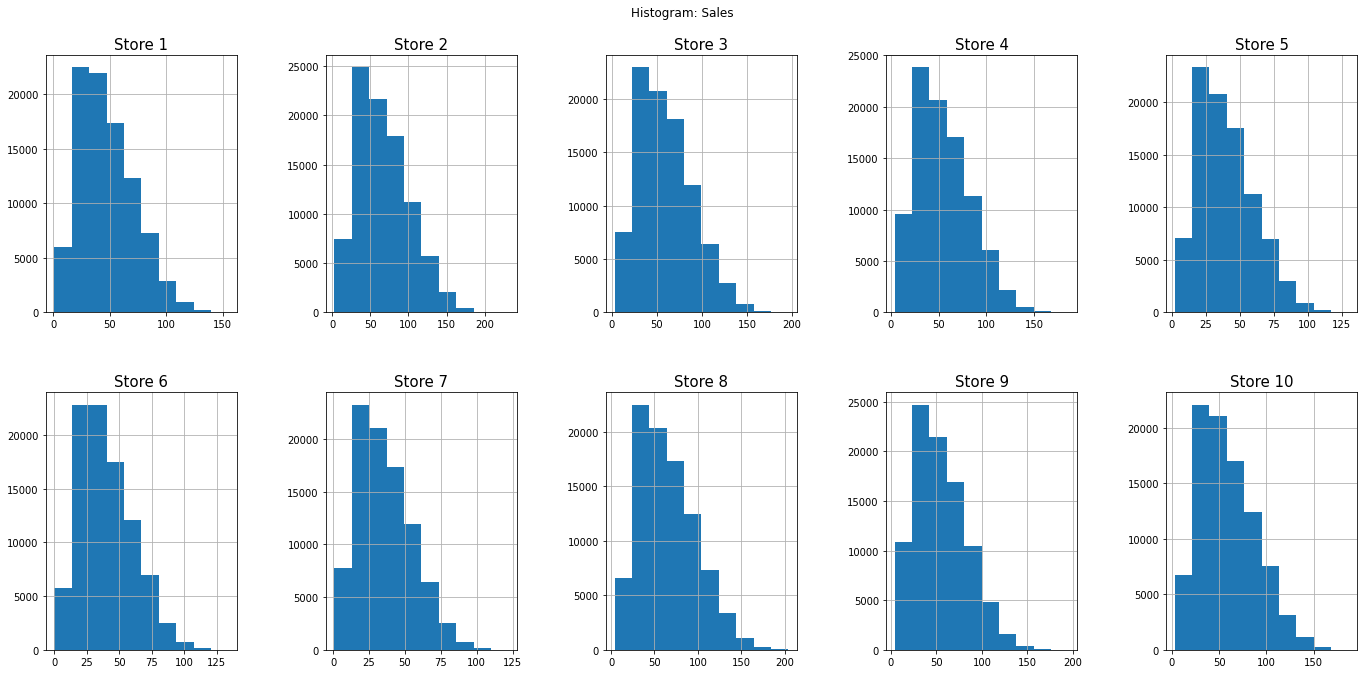

In [35]:
#histogram for store sales 

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i in range(1,11):
    if i < 6:
        df[df.store == i].sales.hist(ax=axes[0, i-1])
        axes[0,i-1].set_title("Store " + str(i), fontsize = 15)
        
    else:
        df[df.store == i].sales.hist(ax=axes[1, i - 6])
        axes[1,i-6].set_title("Store " + str(i), fontsize = 15)
plt.tight_layout(pad=4.5)
plt.suptitle("Histogram: Sales");

In [36]:
def create_date_features(df):
    df['month'] = df.date.dt.month
    df['day_of_month'] = df.date.dt.day
    df['day_of_year'] = df.date.dt.dayofyear
    df['week_of_year'] = df.date.dt.weekofyear
    df['day_of_week'] = df.date.dt.dayofweek + 1
    df['year'] = df.date.dt.year
    df["is_wknd"] = df.date.dt.weekday // 4
    df["quarter"] = df.date.dt.quarter
    df['is_month_start'] = df.date.dt.is_month_start.astype(int)
    df['is_month_end'] = df.date.dt.is_month_end.astype(int)
    df['is_quarter_start'] = df.date.dt.is_quarter_start.astype(int)
    df['is_quarter_end'] = df.date.dt.is_quarter_end.astype(int)
    df['is_year_start'] = df.date.dt.is_year_start.astype(int)
    df['is_year_end'] = df.date.dt.is_year_end.astype(int)
    return df
df = create_date_features(df)

C:\Users\haris\AppData\Local\Temp\ipykernel_6936\1724643028.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df.date.dt.weekofyear


In [37]:
df

,date,store,item,sales,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,2013-01-01,1,1,13,1,1,1,1,2,2013,0,1,1,0,1,0,1,0
1,2013-01-02,1,1,11,1,2,2,1,3,2013,0,1,0,0,0,0,0,0
2,2013-01-03,1,1,14,1,3,3,1,4,2013,0,1,0,0,0,0,0,0
3,2013-01-04,1,1,13,1,4,4,1,5,2013,1,1,0,0,0,0,0,0
4,2013-01-05,1,1,10,1,5,5,1,6,2013,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,12,27,361,52,3,2017,0,4,0,0,0,0,0,0
912996,2017-12-28,10,50,59,12,28,362,52,4,2017,0,4,0,0,0,0,0,0
912997,2017-12-29,10,50,74,12,29,363,52,5,2017,1,4,0,0,0,0,0,0
912998,2017-12-30,10,50,62,12,30,364,52,6,2017,1,4,0,0,0,0,0,0


In [7]:
df2 = df.groupby(['date','item'], as_index = False).sales.sum()
df2

,date,item,sales
0,2013-01-01,1,133
1,2013-01-01,2,327
2,2013-01-01,3,172
3,2013-01-01,4,102
4,2013-01-01,5,83
...,...,...,...
91295,2017-12-31,46,605
91296,2017-12-31,47,211
91297,2017-12-31,48,494
91298,2017-12-31,49,285


Rearranging columns with item as first and date as second.

In [8]:
df3 = df2.groupby(['item','date'],as_index = False).sales.sum()

In [9]:
df3

,item,date,sales
0,1,2013-01-01,133
1,1,2013-01-02,99
2,1,2013-01-03,127
3,1,2013-01-04,145
4,1,2013-01-05,149
...,...,...,...
91295,50,2017-12-27,511
91296,50,2017-12-28,587
91297,50,2017-12-29,596
91298,50,2017-12-30,612


Splitting the dataframe into 50 dataframes to get item specific datasets to analyze and predict the particular item.

In [10]:
item_seperated_dataframes = df3.item.unique()

In [11]:
item_seperated_dataframes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [12]:
DataframeDict = {}
DataframeDict = {x:item_seperated_dataframes for x in item_seperated_dataframes}

In [13]:
DataframeDict


{1: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
       dtype=int64),
 2: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
       dtype=int64),
 3: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
       dtype=int64),
 4: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
       dtype=int64),
 5: 

In [14]:
for key in DataframeDict.keys():
    DataframeDict[key] = df3[:][df3.item == key]

In [15]:
DataframeDict[2]

,item,date,sales
1826,2,2013-01-01,327
1827,2,2013-01-02,279
1828,2,2013-01-03,304
1829,2,2013-01-04,359
1830,2,2013-01-05,377
...,...,...,...
3647,2,2017-12-27,500
3648,2,2017-12-28,495
3649,2,2017-12-29,515
3650,2,2017-12-30,538


In [16]:
DataframeDict[1]['demand'] = DataframeDict[1].sales.rolling(window = 90).sum()


In [17]:
DataframeDict[1]

,item,date,sales,demand
0,1,2013-01-01,133,NaN
1,1,2013-01-02,99,NaN
2,1,2013-01-03,127,NaN
3,1,2013-01-04,145,NaN
4,1,2013-01-05,149,NaN
...,...,...,...,...
1821,1,2017-12-27,154,20796.0
1822,1,2017-12-28,178,20704.0
1823,1,2017-12-29,207,20642.0
1824,1,2017-12-30,236,20578.0


In [18]:
demand_1 = DataframeDict[1]['demand'].dropna().reset_index(drop= True)

In [19]:
demand_1

0       12847.0
1       12848.0
2       12936.0
3       13019.0
4       13103.0
         ...   
1732    20796.0
1733    20704.0
1734    20642.0
1735    20578.0
1736    20610.0
Name: demand, Length: 1737, dtype: float64

In [20]:
DataframeDict[1]

,item,date,sales,demand
0,1,2013-01-01,133,NaN
1,1,2013-01-02,99,NaN
2,1,2013-01-03,127,NaN
3,1,2013-01-04,145,NaN
4,1,2013-01-05,149,NaN
...,...,...,...,...
1821,1,2017-12-27,154,20796.0
1822,1,2017-12-28,178,20704.0
1823,1,2017-12-29,207,20642.0
1824,1,2017-12-30,236,20578.0


In [21]:
DataframeDict[1].drop(axis = 1, columns = ['demand'], inplace = True)

In [22]:
DataframeDict[1]['demand_1'] = pd.DataFrame(demand_1)

In [23]:
DataframeDict[1].isnull().value_counts()

item   date   sales  demand_1
False  False  False  False       1737
                     True          89
dtype: int64

In [24]:
DataframeDict[1].dropna(inplace = True)

In [25]:
df_item_1=DataframeDict[1]

In [26]:
df_item_1

,item,date,sales,demand_1
0,1,2013-01-01,133,12847.0
1,1,2013-01-02,99,12848.0
2,1,2013-01-03,127,12936.0
3,1,2013-01-04,145,13019.0
4,1,2013-01-05,149,13103.0
...,...,...,...,...
1732,1,2017-09-29,270,20796.0
1733,1,2017-09-30,269,20704.0
1734,1,2017-10-01,300,20642.0
1735,1,2017-10-02,195,20578.0


In [27]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='date'>

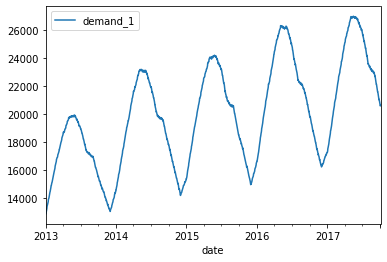

In [28]:
df_item_1.plot(x = 'date',y = 'demand_1')#date vs demand

In [29]:
df_item_1 = np.split(df_item_1, [1300], axis=0)

In [31]:
df_item_1_train = df_item_1[0]
df_item_1_test = df_item_1[1]

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,accuracy_score,confusion_matrix

In [31]:
X = DataframeDict[1].drop("demand_1", axis=1)

y = DataframeDict[1].pop("demand_1")

X.head()

,item,date,sales
0,1,2013-01-01,133
1,1,2013-01-02,99
2,1,2013-01-03,127
3,1,2013-01-04,145
4,1,2013-01-05,149


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)

In [33]:
X_test

,item,date,sales
1608,1,2017-05-28,342
1268,1,2016-06-22,260
1508,1,2017-02-17,179
161,1,2013-06-11,227
520,1,2014-06-05,243
...,...,...,...
946,1,2015-08-05,245
1296,1,2016-07-20,302
918,1,2015-07-08,256
309,1,2013-11-06,173


In [34]:
def date_features(df):
    # Date Features
    df['date'] = pd.to_datetime(dataset['date'])
    df['year'] = dataset.date.dt.year
    df['month'] = dataset.date.dt.month
    df['day'] = dataset.date.dt.day
    df['dayofyear'] = dataset.date.dt.dayofyear
    df['dayofweek'] = dataset.date.dt.dayofweek
    df['weekofyear'] = dataset.date.dt.weekofyear
    
    # Additionnal Data Features
    df['day^year'] = np.log((np.log(dataset['dayofyear'] + 1)) ** (dataset['year'] - 2000))
    
    # Drop date
    df.drop('date', axis=1, inplace=True)
    
    return df

# Dates Features for Train, Test
train, test = date_features(train), date_features(test)

NameError: name 'train' is not defined